# Data Augmentation With Keras
##### Modifying existing data to create new training data. Also helps to reduce overfitting

Some examples are as follows
- flipping, cropping
- rotating
- zooming in and out
- Varying the pixel colors

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

C:\Users\Darshil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Copying this code to plot imgaes with labels
def plots(ims, figsize = (12,6), rows=1,interp=False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        
        if titles is not None:
            sp.set_title(titles[1], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')
        

C:\Users\Darshil\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


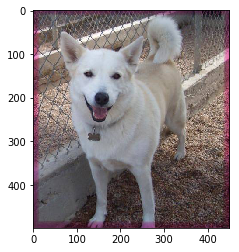

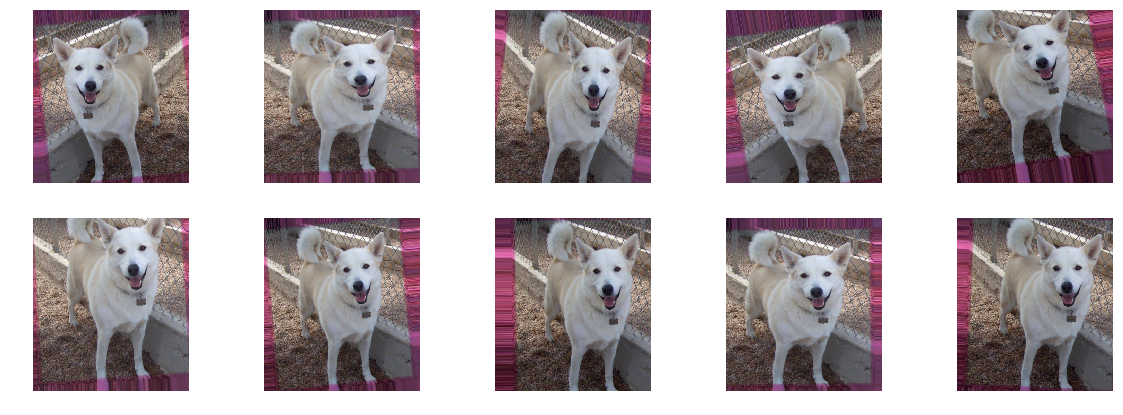

In [8]:
# Defining an image data generator which will help us augment images based on the parameters
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range = 10, horizontal_flip=True)

# Setting an image path to an image to see how it works
image_path = 'C:/Users/Darshil/gitly/Deep-Learning/My Projects/CNN_Keras/train/dog/dog.10594.jpg'

# Obtain the original image
image = np.expand_dims(ndimage.imread(image_path), 0)
plt.imshow(image[0])

# Next we will generate batches of augmented images from this image
aug_iter = gen.flow(image)

# Creating 10 augemented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# Plotting the augmented images
plots(aug_images, figsize=(20,7), rows=2)


https://www.youtube.com/watch?v=zralyi2Ft20&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=19